# Dandiset 001276 Analysis Notebook

This AI-generated notebook provides an introduction to Dandiset 001276: *"NG-CANCAN Remote Targeting Electroporation: Impact of Burst Number Variation on Permeabilization Distribution in Confluent Cell Monolayers"*

## Introduction

**Authors:**  
Silkuniene, Giedre; Silkunas, Mantas; Pakhomov, Andrei  
**Institution:** Old Dominion University, Pakhomov Lab  
**License:** CC-BY-4.0  
 
This dataset contains experiments conducted using a four-electrode array studying the CANCAN protocol's effect on cell monolayers. The protocol utilizes canceling pulses to minimize cell damage near electrodes while targeting cells in the center.

### Key Information
- **Subject:** Mouse (NCBI Taxon 10090)
- **Protocol:** 
  - 600 ns pulses from four electrodes (10.0 mm spacing)
  - 9 packets of pulses at 0.2 MHz frequency
  - Repeated 2, 4, or 6 times at 1 Hz
- **Staining:** 
  - Hoechst (DAPI channel for nuclei)
  - YoPro-1 (FITC channel for membrane permeability)

In [1]:
# Import required packages
from dandi.dandiapi import DandiAPIClient
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme()
plt.style.use('ggplot')

## Accessing the Dandiset

First let's list the available assets (files) in this dandiset:

In [2]:
# List assets in the dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001276")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the dandiset")
for asset in assets[:5]:  # Print first 5 assets
    print(f"- {asset.path} (size: {asset.size/1e6:.1f} MB)")

Found 108 assets in the dandiset
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb (size: 373.4 MB)
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-1h4rh2m_image.nwb (size: 415.3 MB)
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb (size: 471.1 MB)
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-k9o87l_image.nwb (size: 473.9 MB)
- sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb (size: 473.8 MB)


## Loading NWB Data

Let's examine one of the NWB files containing DAPI imaging data:

In [3]:
# Load an example NWB file
nwb_url = "https://lindi.neurosift.org/dandi/dandisets/001276/assets/95141d7a-82aa-4552-940a-1438a430a0d7/nwb.lindi.json"

f = lindi.LindiH5pyFile.from_lindi_file(nwb_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic info
print("Session description:", nwb.session_description.split('\n')[0])
print("Institution:", nwb.institution)
print("Lab:", nwb.lab)
print("Subject ID:", nwb.subject.subject_id)

Session description: Acquisition Description (Subject-Specific): Subject ID: P1_20240627_A2, Fluorescent Channel: DAPI, Phase: pre (where 'pre' indicates imaging prior to exposure and 'post' indicates imaging of the same well after exposure).  CanCan protocol (with canceling pulses),011: Protocol consisted of 9 packets of pulses delivered at 0.2MHz frequency, protocol repeated 2 times at 1Hz frequency. General Protocol Description (Subject-Independent): Experiments were conducted using a four-electrode stainless steel setup with an inter-electrode distance of 10.0 mm. The CanCan exposure protocol involved delivering packets of 600 ns pulses from four electrodes. Initially, a single 600 ns pulse (7.2 kV) was applied from one electrode (e.g., electrode 1), constituting phase 1. Subsequently, simultaneous 600 ns pulses with an amplitude reduced by 12.5% were delivered from two electrodes (e.g., electrodes 2 and 4), followed by another set of simultaneous pulses with an additional 12.5% am

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring the Data

Let's visualize a subset of the DAPI staining from the SingleTimePointImaging data:

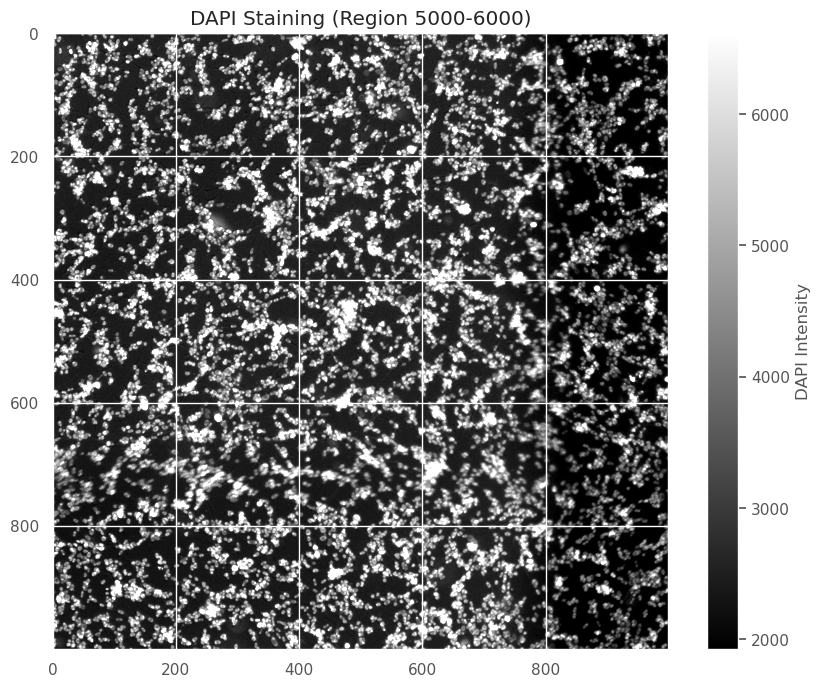

In [4]:
# Get image data
img_series = nwb.acquisition["SingleTimePointImaging"]
data = img_series.data

# Extract and plot 1000x1000 region
x_start, y_start = 5000, 5000
subset = data[0, x_start:x_start+1000, y_start:y_start+1000]

plt.figure(figsize=(10, 8))
plt.imshow(subset, cmap='gray', 
           vmin=np.percentile(subset, 5), 
           vmax=np.percentile(subset, 95))
plt.colorbar(label='DAPI Intensity')
plt.title(f"DAPI Staining (Region {x_start}-{x_start+1000})")
plt.savefig("dapi_sample.png")
plt.show()

## Next Steps for Analysis

Potential analyses to perform:
1. **Cell Segmentation**: Use the DAPI channel to identify nuclei
2. **Intensity Analysis**: Quantify DAPI staining intensity distributions
3. **Spatial Patterns**: Examine cell distribution patterns
 
**Note**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please verify all code and results before drawing scientific conclusions.